In [2]:
# install 'faraway' package from menu
data(package='faraway')

In [7]:
data(coagulation, package='faraway')
ls()

[1] "coagulation" "worldcup"

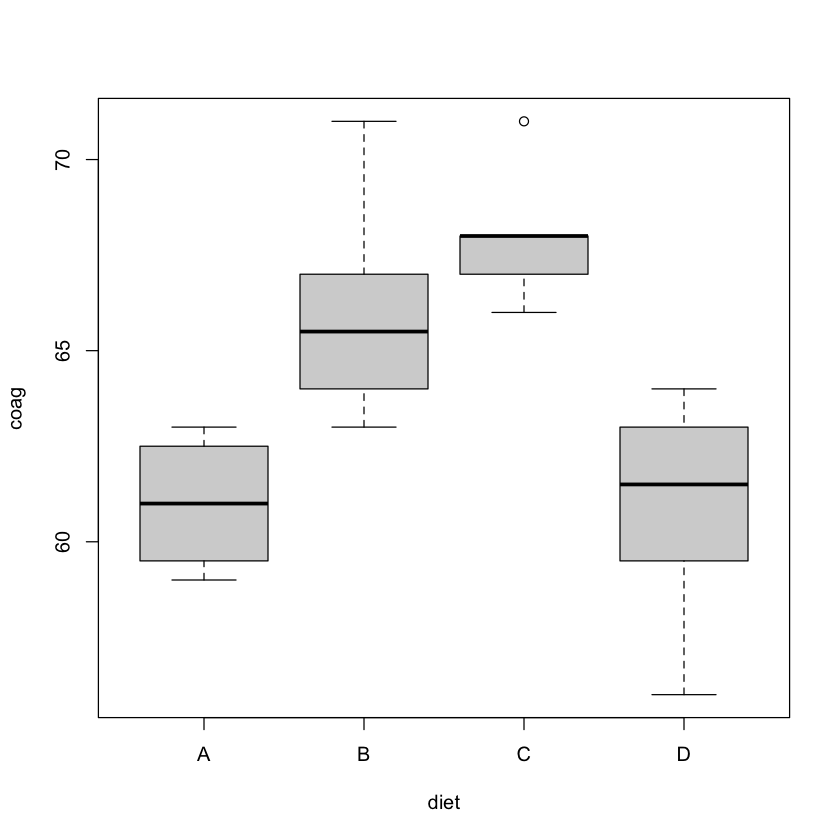

In [10]:
plot(coag~diet, data=coagulation)

In [11]:
summary(coagulation)

      coag       diet 
 Min.   :56.00   A:4  
 1st Qu.:61.75   B:6  
 Median :63.50   C:6  
 Mean   :64.00   D:8  
 3rd Qu.:67.00        
 Max.   :71.00        

# Concatenation operator

In [2]:
# We are commenting
# c() for entering dataset in R
# data = {35, 8, 10, 23, 42}
data.1=c(35, 8, 10, 23, 42)
data.1

[1] 35  8 10 23 42

In [3]:
print(data.1)

[1] 35  8 10 23 42


In [6]:
summary(data.1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0    10.0    23.0    23.6    35.0    42.0 

In [8]:
mean(data.1)

[1] 23.6

In [9]:
sum(data.1)/5

[1] 23.6

In [10]:
sd(data.1)

[1] 14.97665

# Histogram

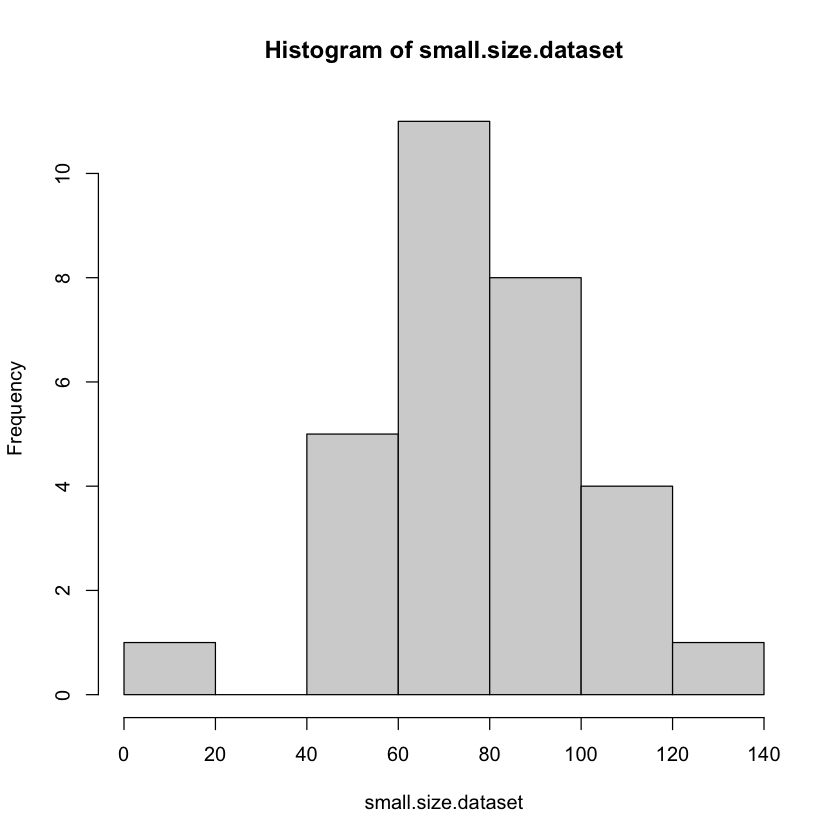

In [11]:
small.size.dataset=c(91,49,76,112,97,42,70, 100, 8, 112, 95, 90, 78, 62, 56, 94, 65, 58, 109, 70, 109, 91, 71, 76, 68, 62, 134, 57, 83, 66)
hist(small.size.dataset)

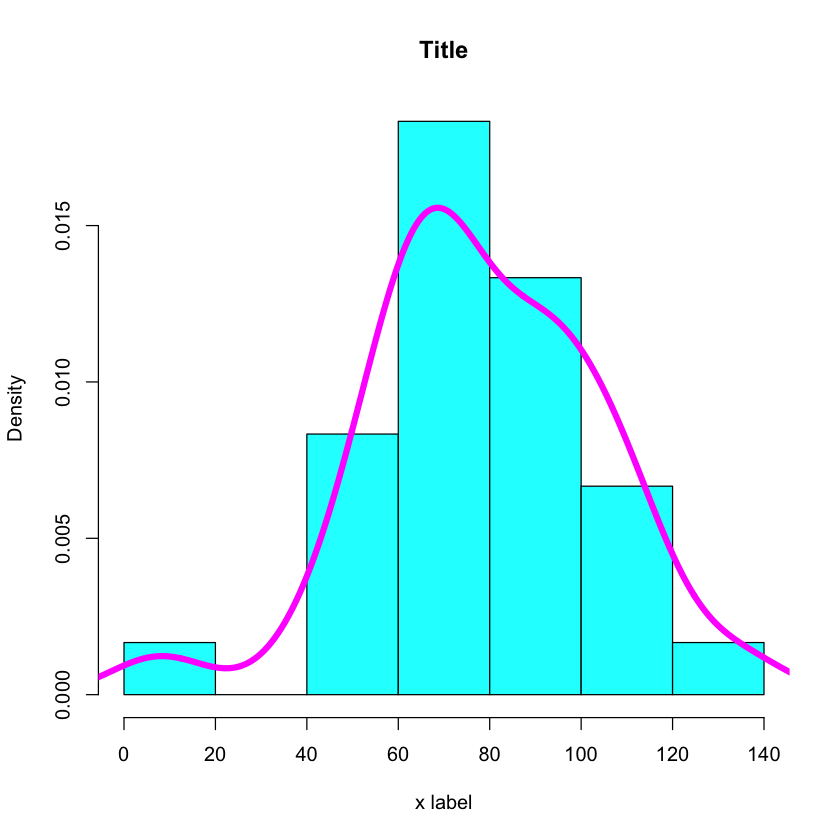

In [20]:
hist(small.size.dataset, xlab='x label', main='Title', freq=F, col='cyan')
# smooth density
lines(density(small.size.dataset), col='magenta', lwd=5)

# Scatter

In [21]:
set.seed(2016)
Test_1_scores=round(rnorm(50, 78, 10))
Test_2_scores=round(rnorm(50, 78, 14))
Test_1_scores

[1]  69  88  77  81  50  75  70  71  82  80  74  75  91  69  94  81  69  88  71
[20]  71  74  71  75  84  80  68  72  91  89  67  68  77  90  63  79  92  70  70
[39]  73  63  77  83  75  72  87  75  65 100  86  61

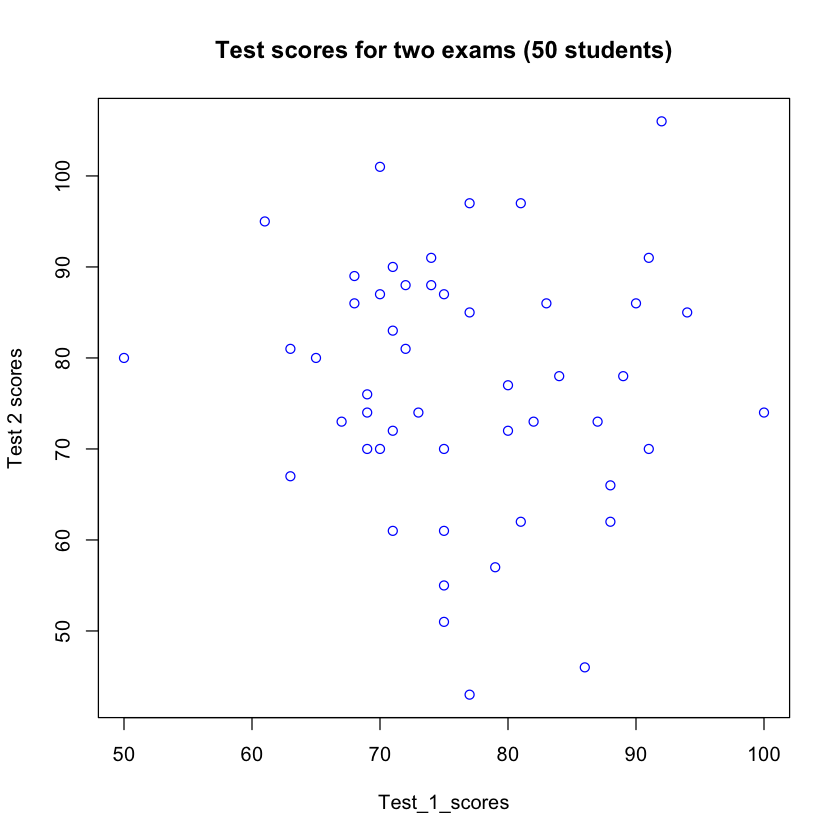

In [23]:
plot(Test_2_scores~Test_1_scores,
     main='Test scores for two exams (50 students)',
     xlab='Test_1_scores',
     ylab='Test 2 scores',
     col='blue')

# Basic Statistics Review

## Linear Regression
$$Y_i = \beta_0 +\beta_1 x_i +\epsilon_i$$
Assumptions:
1. the errors are normally distributed and, on average, zero;
2. the errors all have the same variance (they are homoscedastic), and
3. the errors are unrelated to each other (they are independent across observations).

i.e.,

$$E[\epsilon_i] = 0, Var[\epsilon_i] = \sigma^2 (constant)$$
$$cov(\epsilon_i, \epsilon_j) = 0, \forall i\ne j$$

In [24]:
help(co2)

In [25]:
class(co2) # time series

[1] "ts"

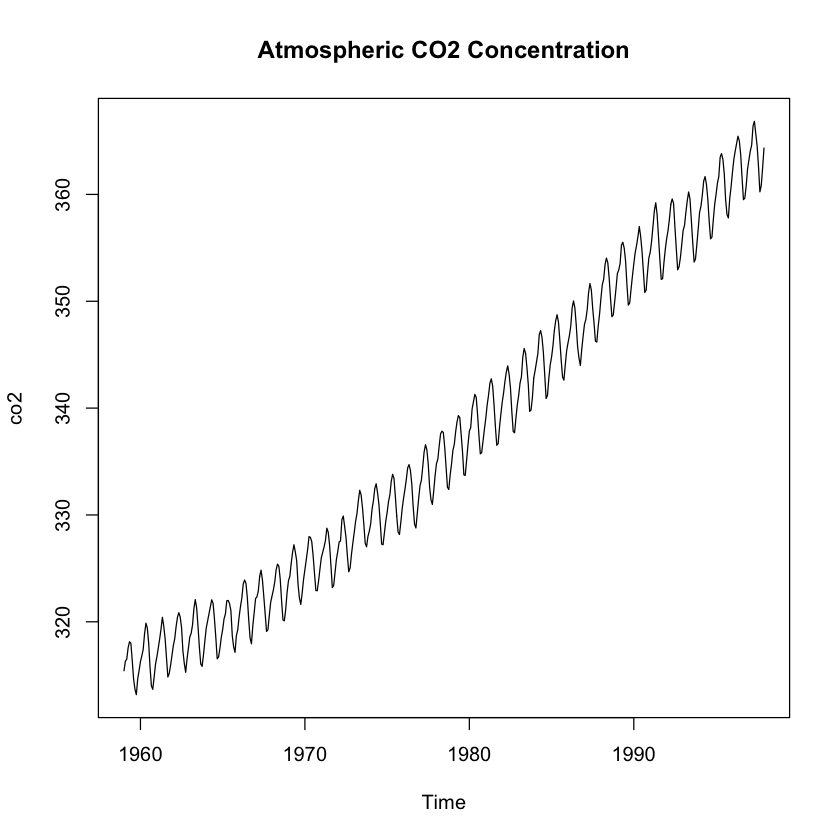

In [26]:
plot(co2, main='Atmospheric CO2 Concentration')
# oscillatory

By hand,
$$slope=b_1=\frac{SS_{xy}}{SS_{xx}} = \frac{\sum_i(x_i-\bar{x})(y_i-\bar{y})}{\sum_i(x_i-\bar{x})^2}$$
$$intercept = b_0 = \bar{y} - b_1\cdot \bar{x}$$

In [31]:
co2.values = as.numeric(co2)
co2.times = as.numeric( time(co2) )
SSxx = sum( (co2.times - mean(co2.times) ) * (co2.times - mean(co2.times) ) ) 
SSxy = sum( (co2.values - mean(co2.values) ) * (co2.times - mean(co2.times) ) )
slope = SSxy / SSxx
intercept = mean(co2.values) - slope*mean(co2.times)
slope

[1] 1.307497

In [32]:
intercept

[1] -2249.774

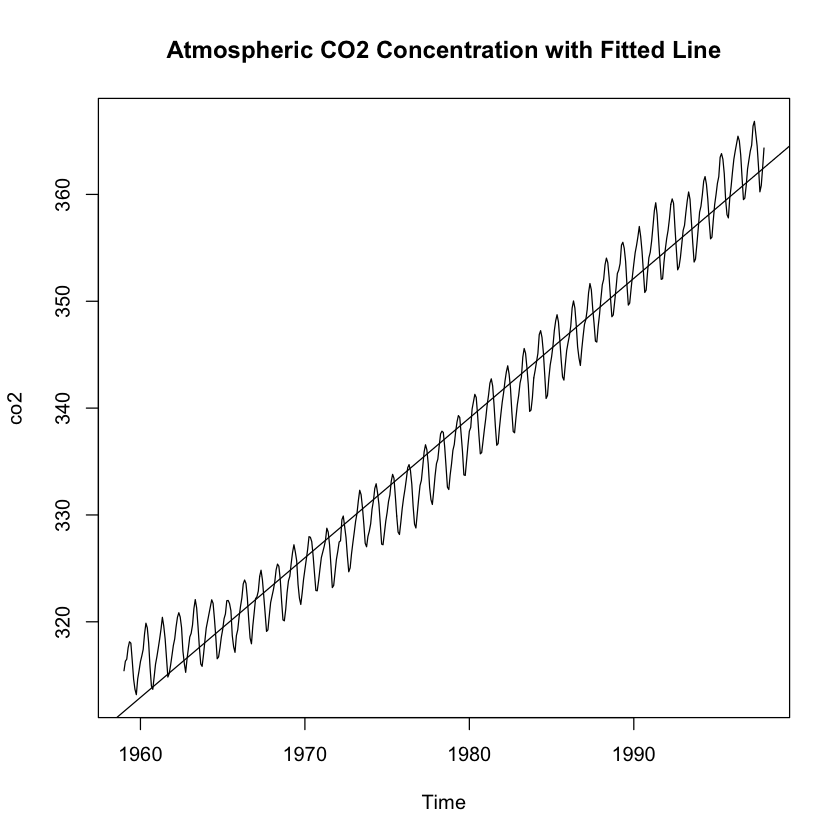

In [33]:
# create linear model
co2.linear.model = lm(co2 ~ time(co2))
plot(co2, main='Atmospheric CO2 Concentration with Fitted Line')
abline(co2.linear.model)

In [36]:
# caculate residual
co2.fitted.values = slope*co2.times + intercept # or lm()$fitted
co2.residuals = co2.values - co2.fitted.values
# or
co2.residuals = resid( co2.linear.model )

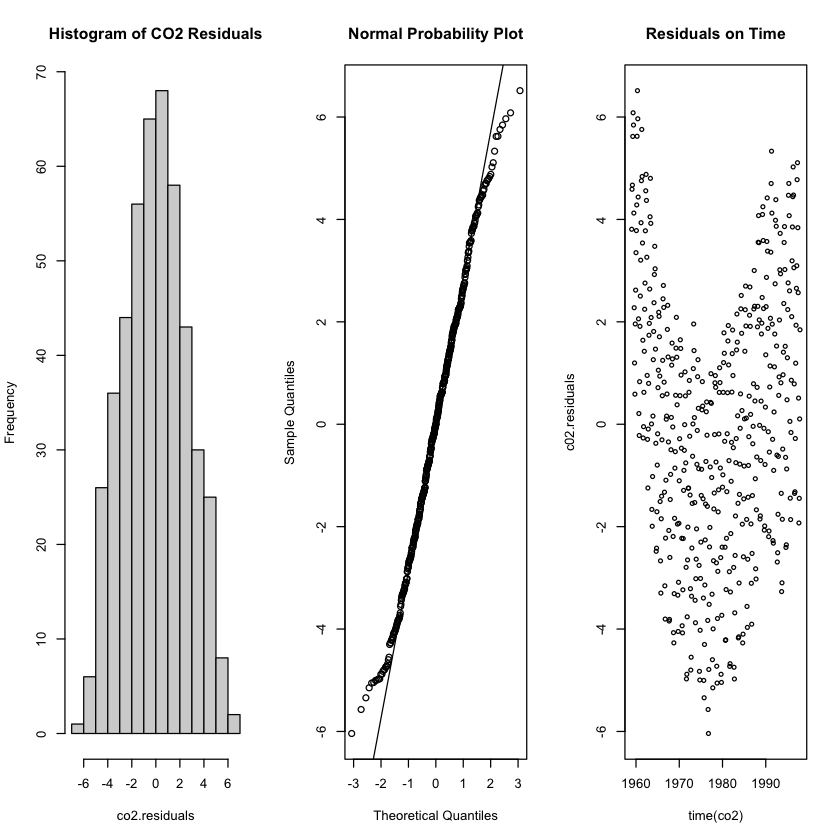

In [40]:
# test residual's normality
par(mfrow=c(1,3)) # par() see plots together
c02.residuals = resid( co2.linear.model )
hist(co2.residuals, main= "Histogram of CO2 Residuals")
qqnorm(c02.residuals, main= "Normal Probability Plot") # straight line if data is normal; look out the quantiles
qqline(c02.residuals)
plot(c02.residuals ~ time(co2), main="Residuals on Time")

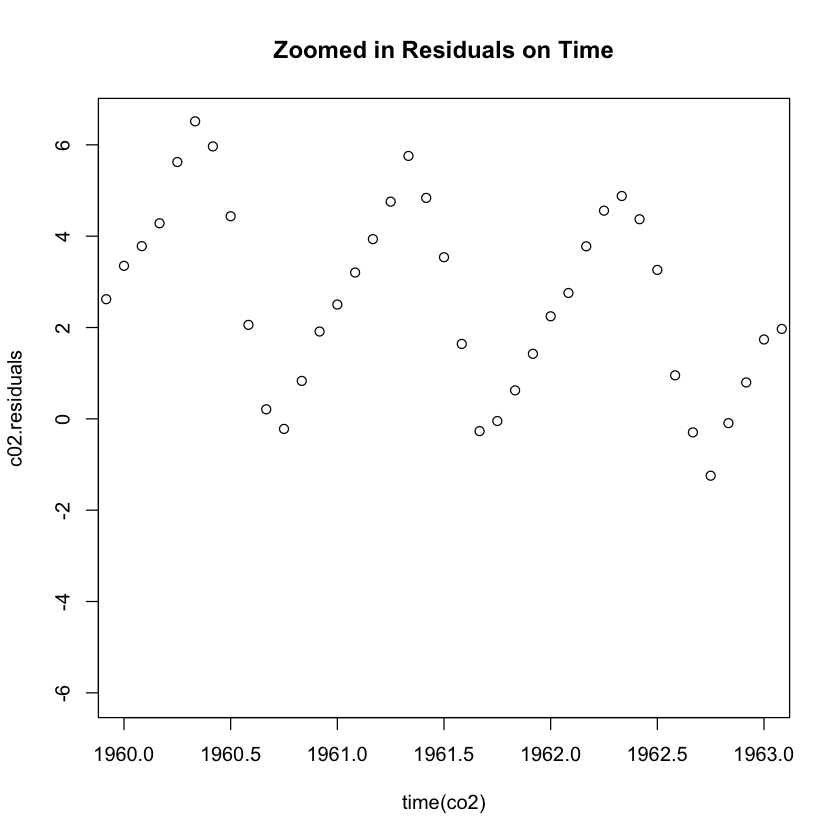

In [41]:
# plot 3 seems reflect macro behavior
# zoom in the residual-time plot by setting xlim
plot(c02.residuals ~ time(co2), xlim=c(1960, 1963), main="Zoomed in Residuals on Time")

## Inference

In [42]:
# the Gosset data
help(sleep)

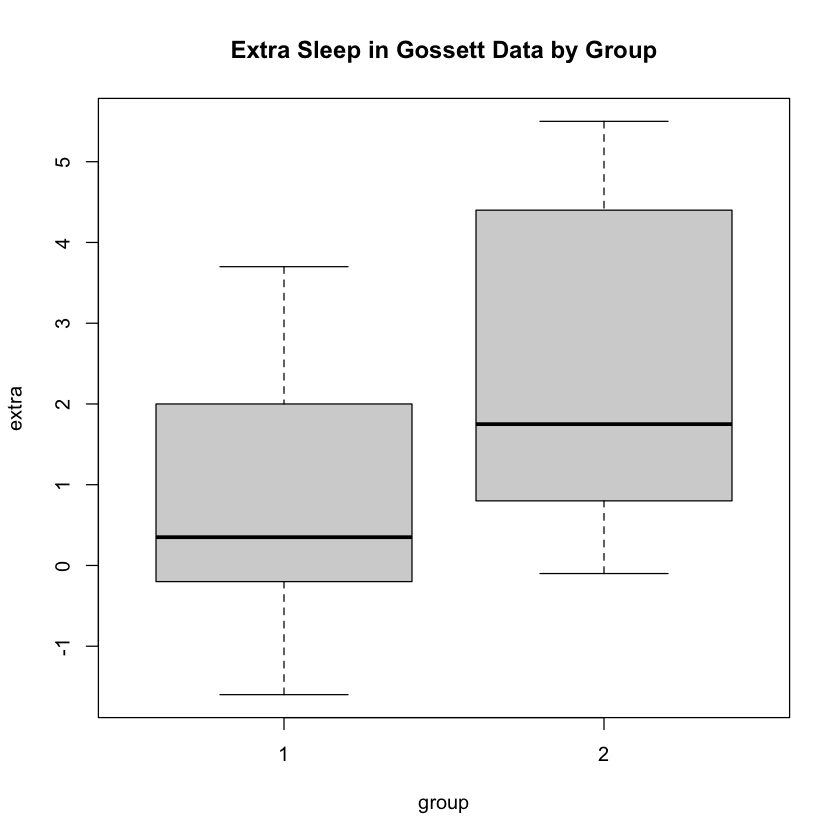

In [43]:
plot(extra~group, data=sleep, main = "Extra Sleep in Gossett Data by Group")

In [44]:
# If you are tired of typing the dollar sign to access a variable, you can “attach” the data frame as
attach(sleep)
extra.1=extra[group==1]
extra.2=extra[group==2]
t.test(extra.1, extra.2, paired=TRUE, alternative="two.sided")


	Paired t-test

data:  extra.1 and extra.2
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


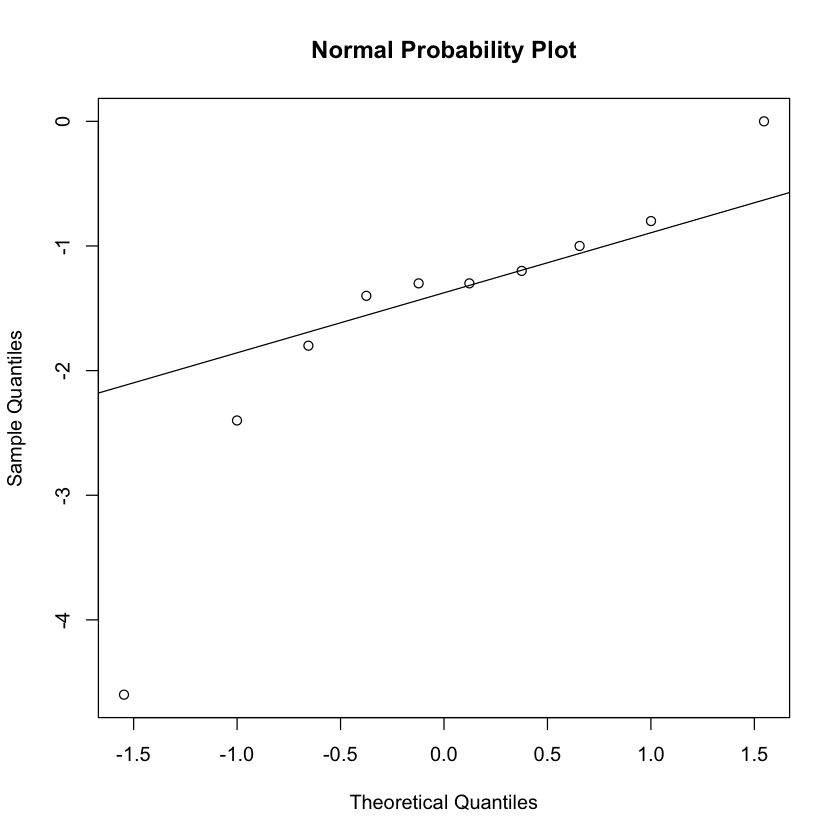

In [45]:
# for the test to be meaningful, we assume that the population of differences is normally distributed.
diffs = extra.1-extra.2
qqnorm(diffs, main= "Normal Probability Plot")
qqline(diffs)

## Correlation Function

In [48]:
# Girth, height and volume of black cherry trees
help(trees)

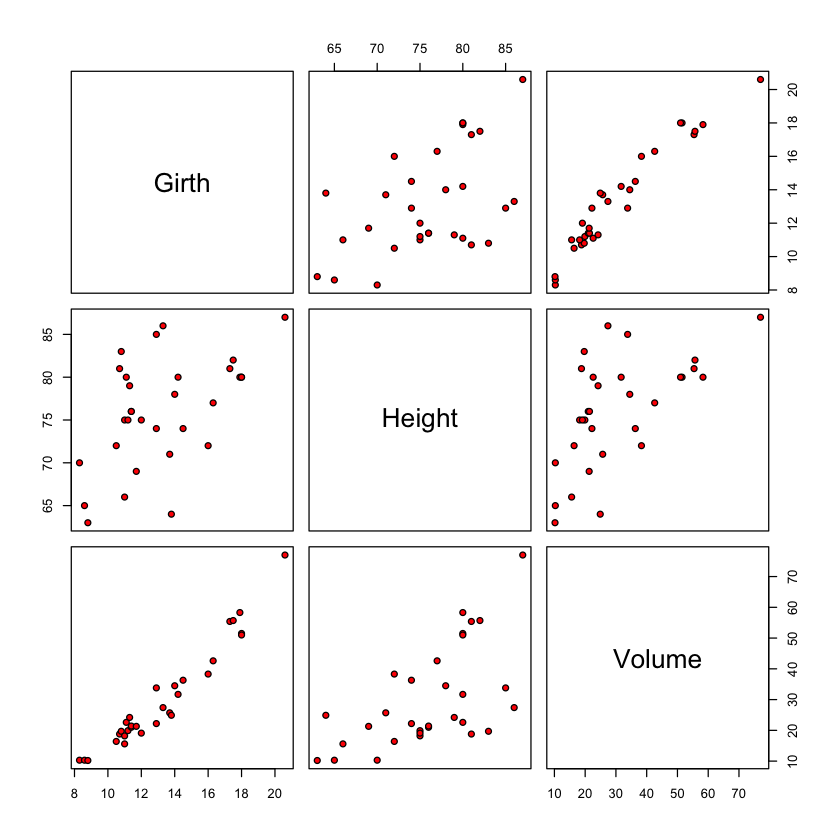

In [49]:
pairs(trees, pch = 21, bg = c("red"))

In [50]:
cov(trees)
# Weird that girth and volume seems more correlated from plot above
# but height and volume has higher covariance

,Girth,Height,Volume
Girth,9.847914,10.38333,49.88812
Height,10.383333,40.60000,62.66000
Volume,49.888118,62.66000,270.20280


In [51]:
cor(trees) # corr ignores units

,Girth,Height,Volume
Girth,1.0000000,0.5192801,0.9671194
Height,0.5192801,1.0000000,0.5982497
Volume,0.9671194,0.5982497,1.0000000
